## Exercise 9 - Image classification with Tensorflow
- In this exercise you utilize CIFAR-100 dataset with Tensorflow for image classification.
- Use [this example](https://hantt.pages.labranet.jamk.fi/ttc2050-material/material/09-ai-image-classification-tensorflow/) as a reference.
- Check the dataset description [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [1]:
from keras.datasets import cifar100
import ssl
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

2 Do the following changes compared to Cifar-10 example:

- Change the loss parameter for the models compile method to be *sparse_categorical_crossentropy*.
- Remove the binary conversion of labels (to_categorical function lines) and use y_train as the input for the model.
- The last layer neutron count must be 100 instead of 10 (10 was used in the example).
- List called *list_index* inside the predict_image function should contain integers from 0 to 99.
- Create a list called *classification* and add classes as elements to this list (100 classes). The list of classes can be found from the dataset description link above. **Important**: These classes should be in the list alphabetically!

Now run the whole notebook and present the model accuracy and model loss visualizations here as a screenshot.

In [27]:
#Create the models architecture
model = Sequential()

#Add the first layer (Convolution layer for extracting the features from the input image)
model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation="relu") )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))

#Add a drop out layer with 50 % dropout rate
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))

#Add a drop out layer with 50 % dropout rate
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))

#Add a layer with 10 neurons and convert data into the probabilities
model.add(Dense(100, activation="softmax"))

In [28]:
#Compile the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
#Train the model
hist = model.fit(x_train, y_train, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 15s 93ms/step - loss: 4.9761 - accuracy: 0.0092 - val_loss: 4.6057 - val_accuracy: 0.0079
Epoch 2/10
157/157 [==============================] - 14s 91ms/step - loss: 4.6054 - accuracy: 0.0103 - val_loss: 4.6062 - val_accuracy: 0.0078
Epoch 3/10
157/157 [==============================] - 14s 92ms/step - loss: 4.6048 - accuracy: 0.0109 - val_loss: 4.6057 - val_accuracy: 0.0086
Epoch 4/10
157/157 [==============================] - 15s 93ms/step - loss: 4.6027 - accuracy: 0.0112 - val_loss: 4.6034 - val_accuracy: 0.0090
Epoch 5/10
157/157 [==============================] - 14s 91ms/step - loss: 4.6004 - accuracy: 0.0109 - val_loss: 4.6011 - val_accuracy: 0.0118
Epoch 6/10
157/157 [==============================] - 14s 91ms/step - loss: 4.5869 - accuracy: 0.0137 - val_loss: 4.5103 - val_accuracy: 0.0184
Epoch 7/10
157/157 [==============================] - 15s 93ms/step - loss: 4.4767 - accuracy: 0.0244 - val_loss: 4.4000 - val_accuracy:

In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 4.0052 - accuracy: 0.1005


[4.005234718322754, 0.10050000250339508]

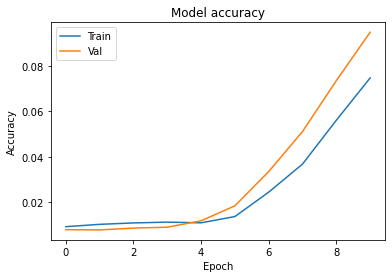

In [31]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

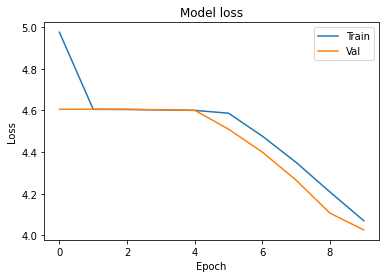

In [32]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

In [3]:
def predict_image(input_img):
    # Image needs to be resized to 32x32 since model input shape was previously set to 32x32,3 --> model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )!
    resized_img = resize(input_img,(32,32,3))

    # Show the image
    img = plt.imshow(input_img)

    #Test the model prediction capabilities for the first test image
    img_prediction = model.predict(np.array([resized_img]))

    #Sort the predictions from least to greatest
    list_index = np.arange(0,99)
    x = img_prediction

    for i in range(10):
        for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp

    #Print the five highest predictions
    for i in range(5):
        print(classification[list_index[i]], ":", round(img_prediction[0][list_index[i]] * 100, 2), "%")

In [2]:
classification = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 
              'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 
              'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
              'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 
              'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 
              'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
              'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
              'woman', 'worm']

3 Check the classes list and find three or more example images from the Internet presenting some of those classes (for example *keyboard*, *shark*, *apple*...). Present five highest predictions to images you have chosen.

bowls : 0.97 %
aquarium : 0.44 %
bee : 0.4 %
beaver : 0.39 %
bed : 0.37 %


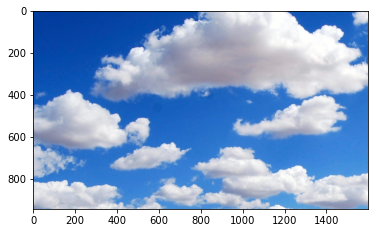

In [42]:
new_img = plt.imread("photos/test_images/clouds.jpg")
predict_image(new_img)

bowls : 1.15 %
bed : 0.53 %
beaver : 0.52 %
bee : 0.52 %
aquarium : 0.49 %


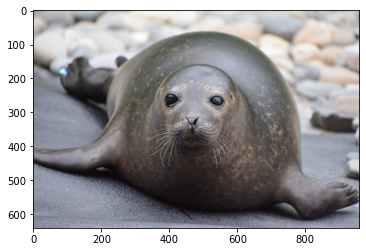

In [43]:
new_img1 = plt.imread("photos/test_images/download-e1578442277105.jpeg")
predict_image(new_img1)

bowls : 0.85 %
aquarium : 0.39 %
bee : 0.34 %
beaver : 0.33 %
bed : 0.31 %


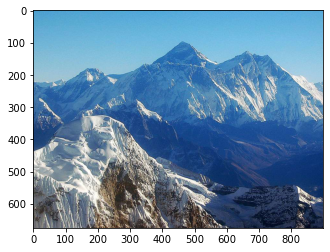

In [44]:
new_img2 = plt.imread("photos/test_images/Himalayas-Nepal.jpg")
predict_image(new_img2)

4 Try to improve the accuracy of your model's predictions by changing the parameters (batch_size, epochs and validation_split). You may also change the structure of your convolutional neural network by adding / removing layers and adjusting the amount of neurons and options present in each layer.

In [3]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model2.add(Conv2D(32, (3,3), activation="relu"))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3,3), activation="relu"))
model2.add(Conv2D(64, (3,3), activation="relu"))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation="softmax"))

In [5]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [6]:
#Train the model
hist2 = model2.fit(x_train, y_train, batch_size = 128, epochs = 12, validation_data=(x_test, y_test), verbose=1)

Epoch 1/12
391/391 [==============================] - 50s 127ms/step - loss: 4.0986 - accuracy: 0.0735 - val_loss: 3.5944 - val_accuracy: 0.1573
Epoch 2/12
391/391 [==============================] - 51s 129ms/step - loss: 3.5069 - accuracy: 0.1637 - val_loss: 3.1812 - val_accuracy: 0.2366
Epoch 3/12
391/391 [==============================] - 52s 133ms/step - loss: 3.2163 - accuracy: 0.2200 - val_loss: 2.9358 - val_accuracy: 0.2854
Epoch 4/12
391/391 [==============================] - 51s 130ms/step - loss: 3.0202 - accuracy: 0.2562 - val_loss: 2.7800 - val_accuracy: 0.3210
Epoch 5/12
391/391 [==============================] - 51s 131ms/step - loss: 2.8651 - accuracy: 0.2846 - val_loss: 2.6411 - val_accuracy: 0.3401
Epoch 6/12
391/391 [==============================] - 51s 131ms/step - loss: 2.7413 - accuracy: 0.3085 - val_loss: 2.5418 - val_accuracy: 0.3554
Epoch 7/12
391/391 [==============================] - 50s 129ms/step - loss: 2.6528 - accuracy: 0.3302 - val_loss: 2.4923 - val_ac

In [8]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.2940 - accuracy: 0.4074


[2.2939846515655518, 0.4074000120162964]

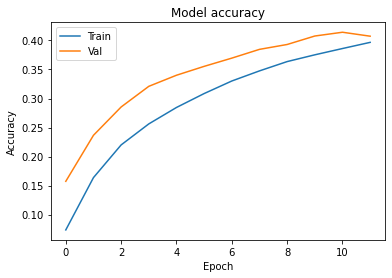

In [9]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

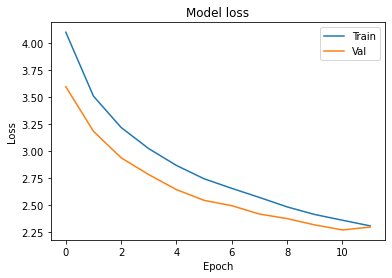

In [10]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

In [11]:
def predict_image2(input_img):
    # Image needs to be resized to 32x32 since model input shape was previously set to 32x32,3 --> model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )!
    resized_img = resize(input_img,(32,32,3))

    # Show the image
    img = plt.imshow(input_img)

    #Test the model prediction capabilities for the first test image
    img_prediction = model2.predict(np.array([resized_img]))

    #Sort the predictions from least to greatest
    list_index = np.arange(0,99)
    x = img_prediction

    for i in range(10):
        for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp

    #Print the five highest predictions
    for i in range(5):
        print(classification[list_index[i]], ":", round(img_prediction[0][list_index[i]] * 100, 2), "%")

bed : 0.69 %
baby : 0.22 %
bottle : 0.18 %
bicycle : 0.1 %
aquarium_fish : 0.05 %


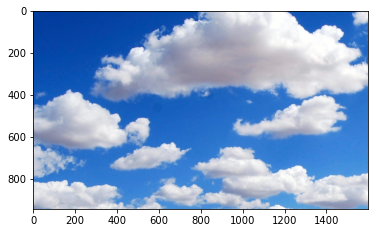

In [12]:
image1 = plt.imread("photos/test_images/clouds.jpg")
predict_image2(image1)

bear : 0.04 %
bed : 0.02 %
bottle : 0.02 %
bicycle : 0.01 %
beaver : 0.0 %


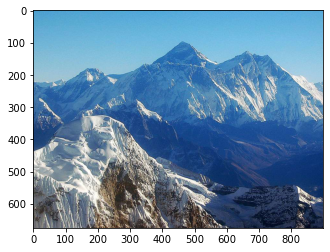

In [13]:
image2 = plt.imread("photos/test_images/Himalayas-Nepal.jpg")
predict_image2(image2)

bear : 6.37 %
beaver : 6.29 %
baby : 0.15 %
bicycle : 0.07 %
beetle : 0.05 %


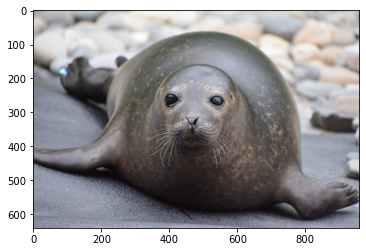

In [14]:
image3 = plt.imread("photos/test_images/download-e1578442277105.jpeg")
predict_image2(image3)

aquarium_fish : 0.01 %
beaver : 0.0 %
bear : 0.0 %
bed : 0.0 %
bottle : 0.0 %


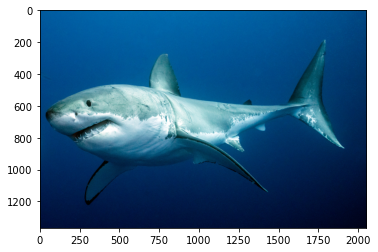

In [15]:
image4 = plt.imread("photos/test_images/shark1.jpg")
predict_image2(image4)

beaver : 0.21 %
bear : 0.05 %
beetle : 0.03 %
bottle : 0.02 %
aquarium_fish : 0.01 %


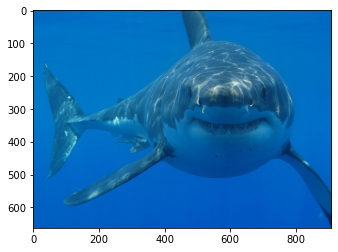

In [16]:
image5 = plt.imread("photos/test_images/Great_white_shark_south_africa.jpg")
predict_image2(image5)

bee : 0.29 %
bear : 0.26 %
beaver : 0.18 %
baby : 0.04 %
bicycle : 0.03 %


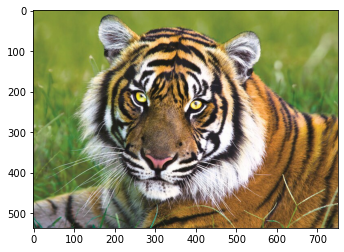

In [17]:
image6 = plt.imread("photos/test_images/tiger-i91844.jpg")
predict_image2(image6)

bottle : 12.6 %
bed : 0.03 %
baby : 0.03 %
beetle : 0.0 %
apple : 0.0 %


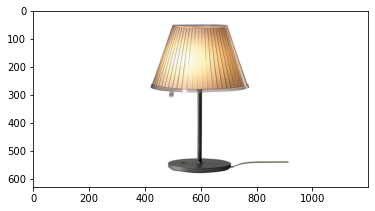

In [18]:
image7 = plt.imread("photos/test_images/Artemide_Choose-Tavolo-Tischleuchte_1200x630-ID1244137-6b26b748c53db9143ef4cc7a64deb941.jpg")
predict_image2(image7)